# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## **Imports, Data Processing**

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# you can performs your training on train/test dataset alone if there are computational issues

In [4]:
trainX = np.reshape(testX, (len(testX), 28*28))
trainy = testy

In [5]:
unique, count = np.unique(trainy, return_counts = True)
print(np.asarray((unique, count)))

[[   0    1    2    3    4    5    6    7    8    9]
 [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]]


## Part1: K Means

In [6]:
from sklearn.cluster import KMeans

In [7]:
#implement elbow method from scratch
def wcss(X, labels, cluster_centers):
  sum = 0
  for i in range(0, X.shape[0]):
    sum+=((X[i]-cluster_centers[labels[i]])**2).sum()
  return sum
def elbow(X, max_k):
  WCSS = []
  for i in range(1, max_k+1):
    model = KMeans(n_clusters = i).fit(X)
    WCSS.append(wcss(X, model.labels_, model.cluster_centers_))

  plt.figure(figsize = (9, 6))
  plt.plot(range(1, max_k+1), WCSS)
  plt.xlabel("Number of Clusters")
  plt.ylabel("Inertia or WCSS")
  plt.xticks(range(1, max_k+1))
  plt.title("WCSS vs number of cluster")
  plt.show()

In [8]:
# silhoette method
from sklearn.metrics import silhouette_score

def silhouette(X, max_k):
  scores = [silhouette_score(X, KMeans(n_clusters = i).fit(X).labels_) for i in range(2, max_k+1)]
  print(f"Heighest Score is for k = {(scores.index(max(scores))+1)}")
  plt.figure(figsize = (9, 6))
  plt.plot(range(2, max_k+1), scores, marker = "o")
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette score")
  plt.xticks(range(2, max_k+1))
  plt.title("Silhouette score vs number of cluster")
  plt.show()

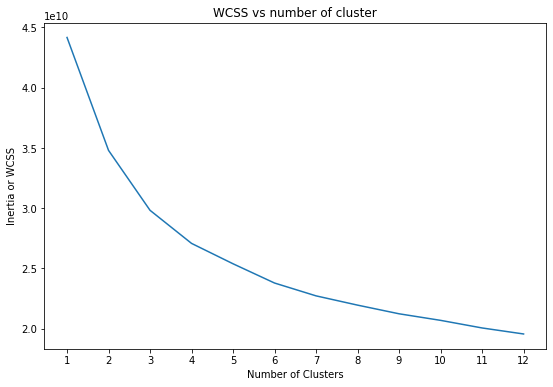

In [9]:
elbow(trainX, 12)

Heighest Score is for k = 1


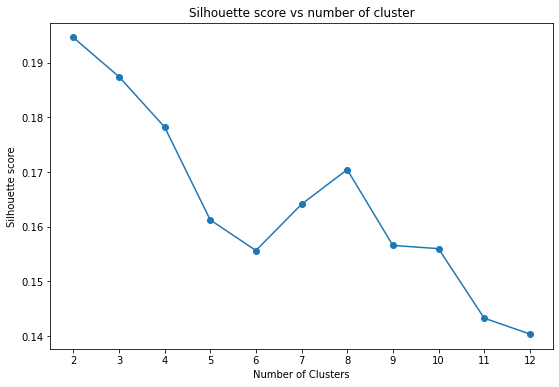

In [10]:
silhouette(trainX, 12)

In [11]:
kmeans_plus_plus = KMeans(n_clusters = 7, init = "k-means++", random_state = 50).fit(trainX)

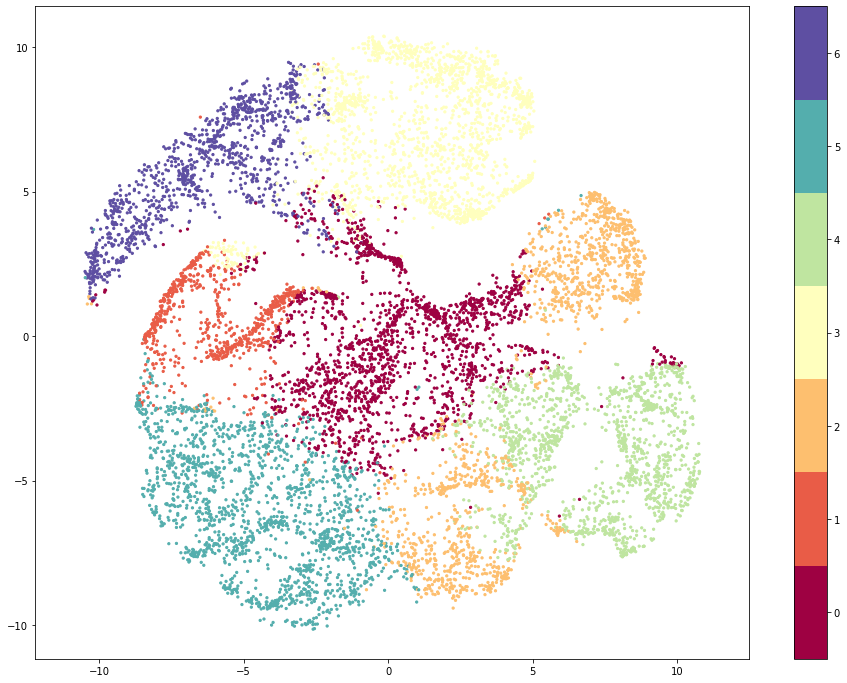

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(trainX)
plt.figure(figsize=(16,12))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=kmeans_plus_plus.labels_, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(8)-0.5).set_ticks(np.arange(7))

In [13]:
kmeans_random = KMeans(n_clusters = 7, init = "random", random_state = 50).fit(trainX)

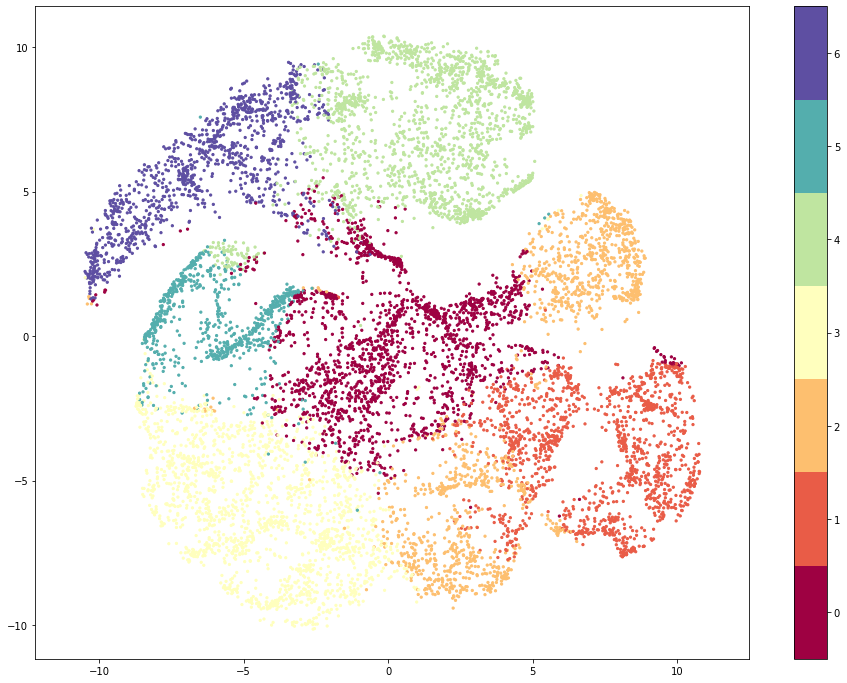

In [14]:
plt.figure(figsize=(16,12))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=kmeans_random.labels_, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(8)-0.5).set_ticks(np.arange(7))

## Part2: Hierarchical clustering

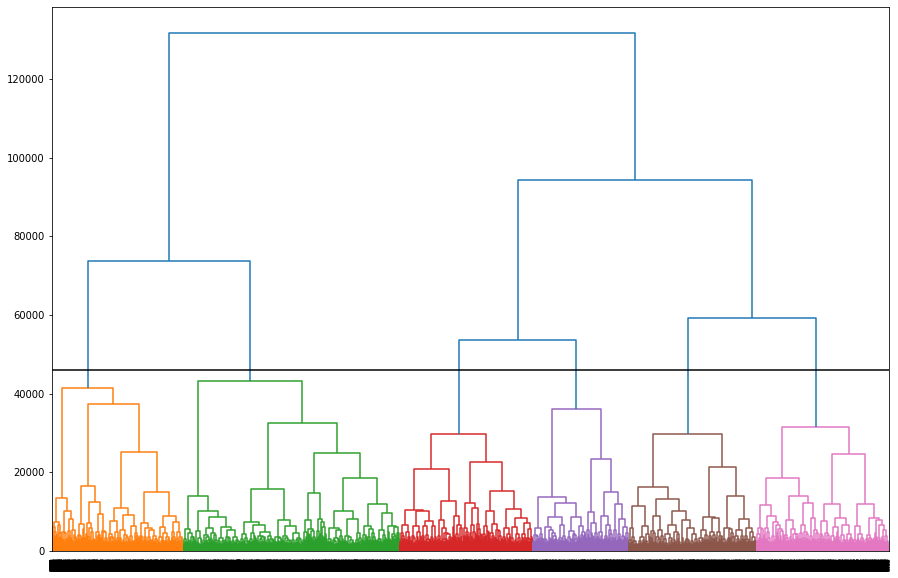

In [15]:
#visualize a dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
def dendo():
  plt.figure(figsize = (15, 10))
  dendrogram(linkage(trainX, method='ward', metric='euclidean'), color_threshold=46000)
  plt.axhline(y=46000, c='k')
  plt.show()
dendo()

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
We look for the clusters with the longest branches, the shorter they are, the more similar they are to following child nodes and leaves. But the optimal number of clusters can depend on the context and application.

for the above dendogram I think its fine to consider 6 clusters based on the horizontal line drawn,
we can also consider 4 big clusters if we raise the threshold by some amount.





In [16]:
# implement hierarchical clustering ( you can use scikit module)
from sklearn.cluster import AgglomerativeClustering as aglmc
def hierarchical_clustering(X, link_type, k):
  model = aglmc(n_clusters = k, linkage = link_type).fit(X)
  return model.labels_

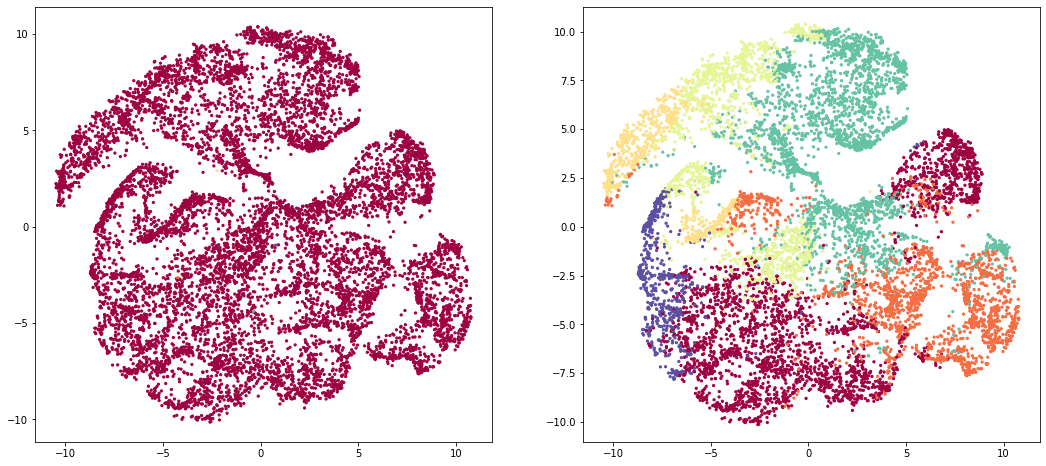

In [19]:
#visualisation of clusters using single linkage and complete linkage

single_link_labels = hierarchical_clustering(trainX, 'single', 6)
complete_link_labels  = hierarchical_clustering(trainX, 'complete', 6)

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=single_link_labels, cmap='Spectral')
plt.subplot(1, 2, 2)
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=complete_link_labels, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')

plt.show()

**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
 Single linkage calculates the distance between clusters as the minimum distance between any two points in the two clusters, while complete linkage calculates the distance as the maximum distance between any two points in the two clusters.

 Single linkage is more sensitive to outliers than complete linkage because it tends to form long, stringy clusters that can be easily influenced by outliers. Complete linkage, on the other hand, is less sensitive to outliers because it tends to form compact clusters.

## Part3: Image Compression

Original                     compression with k= 100       compression with k= 50       compression with k= 25       compression with k= 10       compression with k= 5


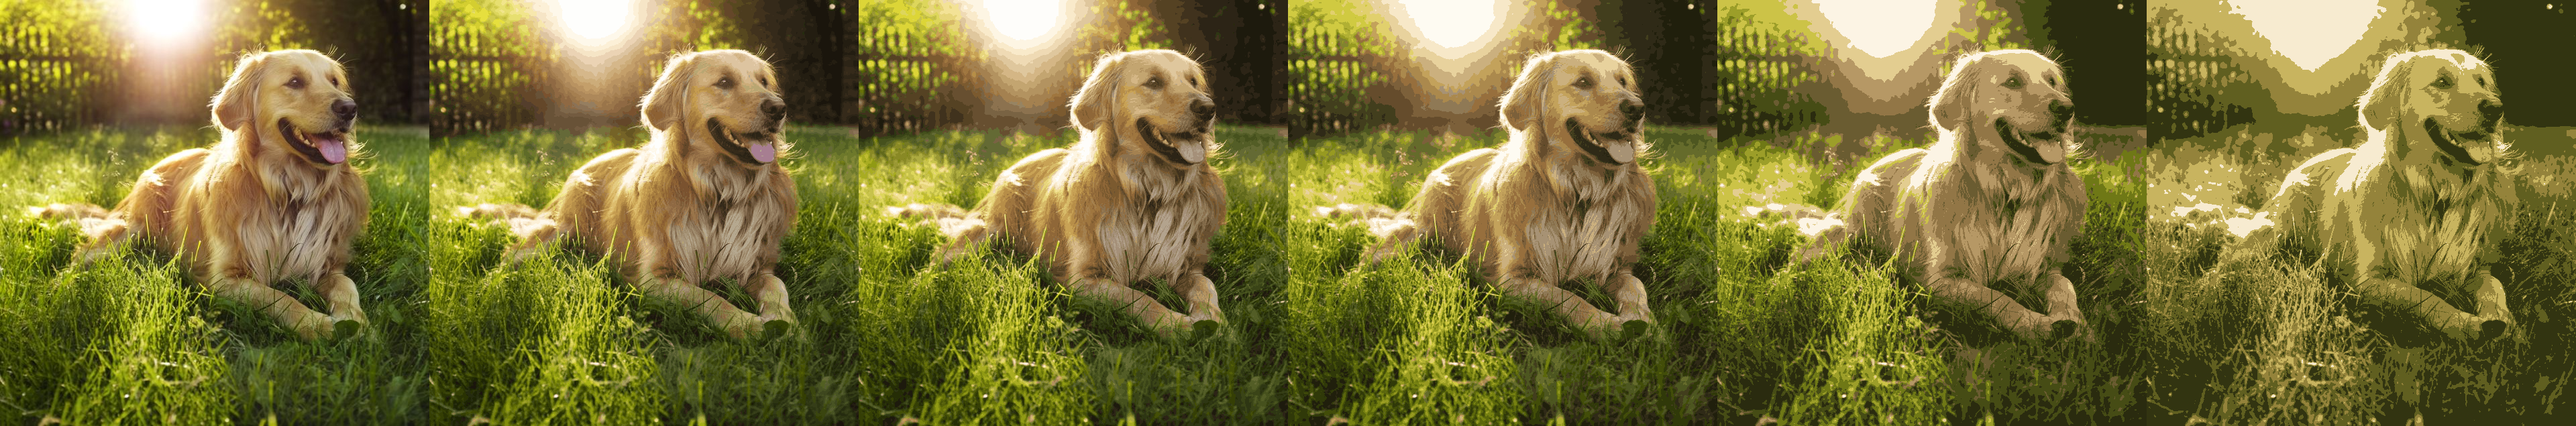

no compression size = 9753600 bits
compression with k = 100, size = 2847200 bits, reduced = 6906400 bits
compression with k = 50, size = 2439600 bits, reduced = 7314000 bits
compression with k = 25, size = 2032600 bits, reduced = 7721000 bits
compression with k = 10, size = 1625840 bits, reduced = 8127760 bits
compression with k = 5, size = 1219320 bits, reduced = 8534280 bits



In [18]:
# Boiler plate code
import cv2
from google.colab.patches import cv2_imshow
import math
img = cv2.imread('dog.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2_imshow(img)
img_size = img.shape
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])
original_size = 8*img_size[0]*img_size[1]*img_size[2]
string = f"Original              "
stats = f"no compression size = {original_size} bits\n"
for k in [100, 50, 25, 10, 5]:
  model = KMeans(n_clusters = k).fit(X)
  centroids = model.cluster_centers_
  labels = model.labels_
  X_ = np.array([centroids[label] for label in labels])
  X_ = np.reshape(X_, img_size)
  img = np.hstack((img, X_))
  compressed_size = k*24 + img_size[0]*img_size[1]*math.ceil(math.log2(k))
  string+= f"       compression with k= {k}"
  stats+= f"compression with k = {k}, size = {compressed_size} bits, reduced = {original_size - compressed_size} bits\n"
  
print(string)
cv2_imshow(img)    
print(stats)